In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from matplotlib.animation import FuncAnimation
import os

from params import *

#### Plot setting

In [2]:
n_arrows = 15
h_lower = 5000
h_upper = 20000

m_lower = 18000
m_upper = 80000

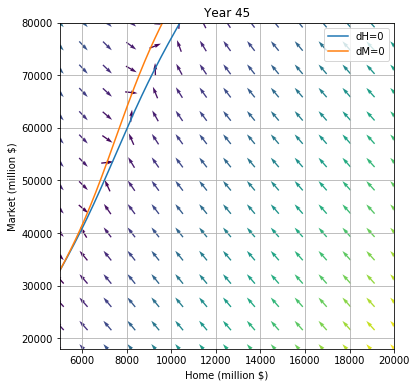

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))

def plotYear(t):
    h = np.linspace(h_lower, h_upper, n_arrows)
    m = np.linspace(m_lower, m_upper, n_arrows)

    hh, mm = np.meshgrid(h, m)

    dH_grid = UBI * np.exp(gamma * t) - c * hh - logistic(hh) + (1 - tI) * wageDecay(t, w) * mm
    dM_grid = (1 - tC) * c * hh + fMultiplier * logistic(hh) - wageDecay(t, w) * mm - tVAT * mm + econGrowth * mm


    m0 = np.linspace(m_lower, m_upper, 1000)
    h0 = [solveH(m_, t) for m_ in m0]
    
    h1 = np.linspace(h_lower, h_upper, 1000)
    m1 = [solveM(h_, t) for h_ in h1]

    # normalize arrow
    M = (np.hypot(dH_grid, dM_grid))
    M[ M == 0] = 1.
    dH_grid /= M 
    dM_grid /= M

    ax.cla()
    ax.quiver(hh, mm, dH_grid, dM_grid, M, pivot='mid')
    ax.plot(h0, m0, label="dH=0")
    ax.plot(h1, m1, label="dM=0")

    ax.grid()

    ax.set_xlim(h_lower, h_upper)
    ax.set_ylim(m_lower, m_upper)

    ax.set_xlabel("Home (million $)")
    ax.set_ylabel("Market (million $)")

    ax.legend(loc="upper right", frameon=True)
    ax.set_title("Year %i"%t)
    
    plt.savefig("outputs/time.png")
    return ax

plotYear(45)

#### Animation setting

In [4]:
# duration in seconds
duration = 4

# frames per seconds
fps = 25

# total steps
end = 100

# step per frame
spf = int(end / (duration * fps))
print("%i steps per frame"%spf)

frames = []
for i in range(end // spf + 1):
    idx_end = min(end - 1, (i + 1) * spf)
    frames.append(idx_end)
    
fname = 'outputs/animated_time_%is_%ifps_%iarrows_%fvat_v2.gif'%(duration, fps, n_arrows, tVAT)
print(fname)

1 steps per frame
outputs/animated_time_4s_25fps_15arrows_0.006250vat_v2.gif


In [5]:
def update(t):
    print('Year %i'%t, end="\r")
    return plotYear(t)

# if not os.path.isfile(fname):
anim = FuncAnimation(fig, update, frames=frames, interval=1000 / fps)
anim.save(fname, dpi=80, writer='imagemagick')
plt.close()